Upload your selfie.jpg file:


Saving IMG_20241107_200543.jpg to IMG_20241107_200543.jpg


/tmp/ipython-input-3707018252.py:62: RuntimeWarning: overflow encountered in scalar subtract
  elif n <= center - T:
/tmp/ipython-input-3707018252.py:60: RuntimeWarning: overflow encountered in scalar add
  if n >= center + T:


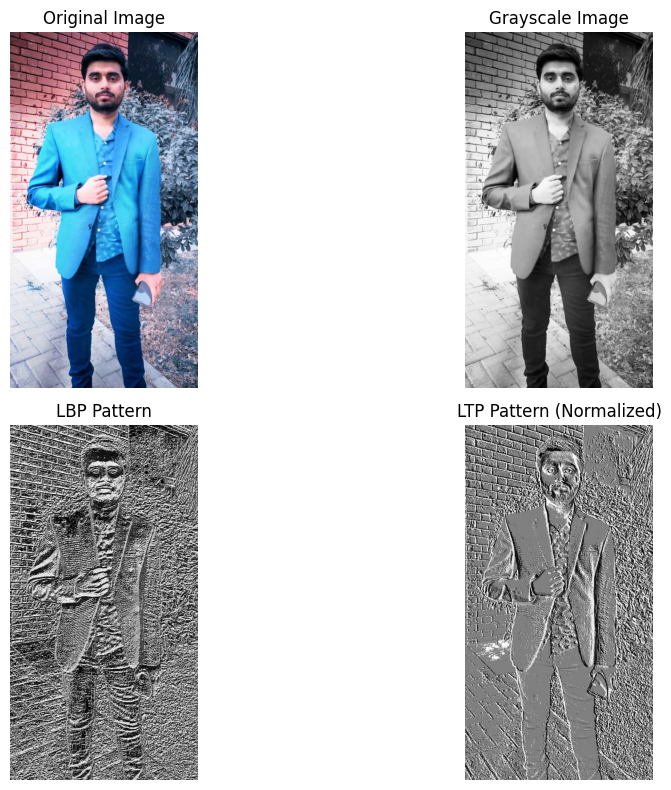

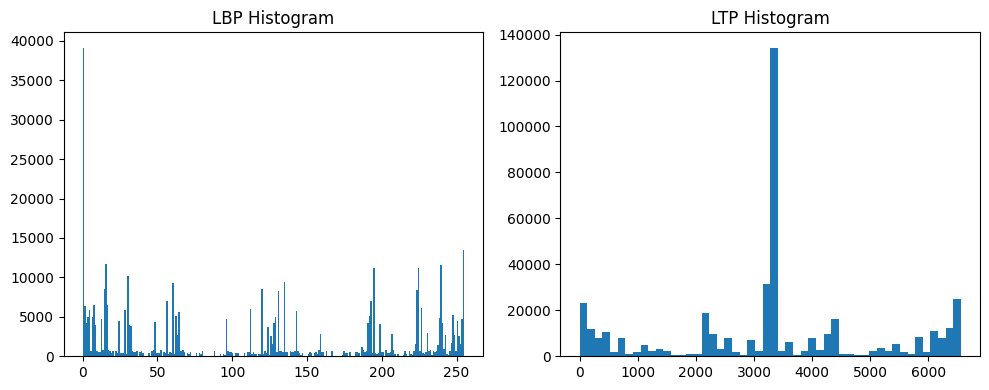

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload your image
print("Upload your selfie.jpg file:")
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]

# ---------------------------
# Load & Preprocess Image
# ---------------------------
img = cv2.imread(filename)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ---------------------------
# LBP Function
# ---------------------------
def lbp(image):
    h, w = image.shape
    lbp_img = np.zeros((h-2, w-2), dtype=np.uint8)

    for i in range(1, h-1):
        for j in range(1, w-1):
            center = image[i, j]
            code = 0
            code |= (image[i-1, j-1] > center) << 7
            code |= (image[i-1, j] > center) << 6
            code |= (image[i-1, j+1] > center) << 5
            code |= (image[i, j+1] > center) << 4
            code |= (image[i+1, j+1] > center) << 3
            code |= (image[i+1, j] > center) << 2
            code |= (image[i+1, j-1] > center) << 1
            code |= (image[i, j-1] > center)
            lbp_img[i-1, j-1] = code
    return lbp_img

# ---------------------------
# LTP Function (threshold = 5)
# ---------------------------
def ltp(image, T=5):
    h, w = image.shape
    ltp_img = np.zeros((h-2, w-2), dtype=np.int32)

    for i in range(1, h-1):
        for j in range(1, w-1):
            center = image[i, j]
            result = []

            neighbors = [
                image[i-1, j-1], image[i-1, j], image[i-1, j+1],
                image[i, j+1], image[i+1, j+1], image[i+1, j],
                image[i+1, j-1], image[i, j-1]
            ]

            for n in neighbors:
                if n >= center + T:
                    result.append(1)
                elif n <= center - T:
                    result.append(-1)
                else:
                    result.append(0)

            ltp_val = 0
            for k in range(8):
                ltp_val += (result[k] + 1) * (3 ** k)
            ltp_img[i-1, j-1] = ltp_val

    return ltp_img

# ---------------------------
# Compute LBP & LTP
# ---------------------------
lbp_img = lbp(img_gray)
ltp_img = ltp(img_gray)

# ---------------------------
# Display Images
# ---------------------------
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(img_gray, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(lbp_img, cmap="gray")
plt.title("LBP Pattern")
plt.axis("off")

plt.subplot(2, 2, 4)
ltp_normalized = cv2.normalize(ltp_img, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
plt.imshow(ltp_normalized, cmap="gray")
plt.title("LTP Pattern (Normalized)")
plt.axis("off")

plt.tight_layout()
plt.show()

# ---------------------------
# Plot Histograms
# ---------------------------
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(lbp_img.ravel(), bins=256, range=(0, 255))
plt.title("LBP Histogram")

plt.subplot(1, 2, 2)
plt.hist(ltp_img.ravel(), bins=50)
plt.title("LTP Histogram")

plt.tight_layout()
plt.show()